# Earthquake Detecter using Geographical Visualization 
### Prgrammer: Sarim Chaudhary
### Date: 6-Apr-2020


In [12]:
import os # Importing Basemap - An extension of matplotlib for geographical visualization
os.environ["PROJ_LIB"] = "C:\\Users\\SARIM\\Anaconda3\\Library\\share"; 
from mpl_toolkits.basemap import Basemap

In [35]:
import csv
import urllib.request as urllib2
from io import StringIO
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [24]:
class EarthQuake:
  def __init__(self, row):
    self.timestamp = row[0]
    self.lat = float(row[1])
    self.lon = float(row[2])
    try:
      self.magnitude = float(row[4])
    except ValueError:
      self.magnitude = 0
    
def get_earthquake_data(url):    #earthquake csv data from USGS
  response = urllib2.urlopen(url)
  csvio = StringIO(response.read().decode('utf-8'))
  reader = csv.reader(csvio)
  header = next(reader)
  quakes = [EarthQuake(row) for row in reader]
  quakes = [q for q in quakes if q.magnitude > 0]
  return quakes
  
quakes = get_earthquake_data('http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_week.csv')
print(quakes[5].__dict__)

{'timestamp': '2020-04-06T00:19:58.850Z', 'lat': 33.5123329, 'lon': -116.5151672, 'magnitude': 1.08}


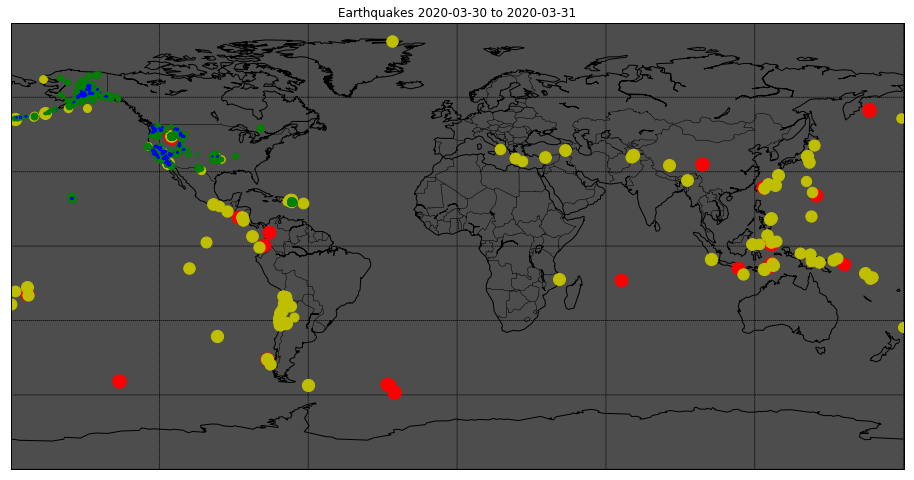

In [46]:
mpl.rcParams['figure.figsize'] = '16, 12'
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='0.3')
m.drawparallels(np.arange(-90.,99.,30.))
junk = m.drawmeridians(np.arange(-180.,180.,60.))

def get_marker(magnitude):
    markersize = magnitude * 2.5;
    if magnitude < 1.0:
        return ('bo'), markersize
    if magnitude < 3.0:
        return ('go'), markersize
    elif magnitude < 5.0:
        return ('yo'), markersize
    else:
        return ('ro'), markersize
    
quakes.sort(key=lambda q: q.magnitude, reverse=True)
for q in quakes:
    x,y = m(q.lon, q.lat)
    mcolor, msize = get_marker(q.magnitude)
    m.plot(x, y, mcolor, markersize=msize)

# add a title
plt.title("Earthquakes {0} to {1}".format(quakes[-1].timestamp[:10],
                                          quakes[0].timestamp[:10]))


plt.show()

### Magnitude 
#### Red     > 5
#### Yellow < 5
#### Green  > 3
#### Blue  < 1

## Result - China and Columbia affected this last week with magnitude of greater than 5.